In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [120]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [121]:
df 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [122]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [123]:
type(df)

pandas.core.frame.DataFrame

In [124]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [125]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [126]:
df.shape

(158, 12)

<AxesSubplot:>

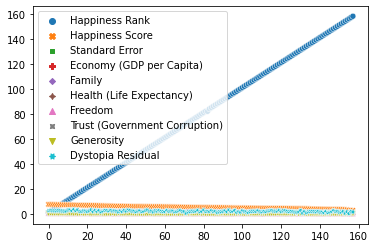

In [127]:
sns.scatterplot(data=df)

<AxesSubplot:xlabel='Happiness Score', ylabel='Dystopia Residual'>

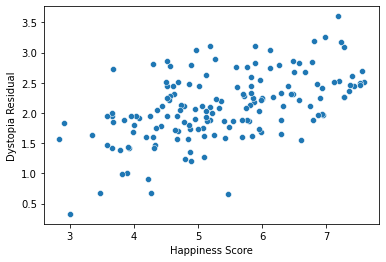

In [128]:
sns.scatterplot(x='Happiness Score',y='Dystopia Residual',data=df)

<AxesSubplot:xlabel='Happiness Score', ylabel='Health (Life Expectancy)'>

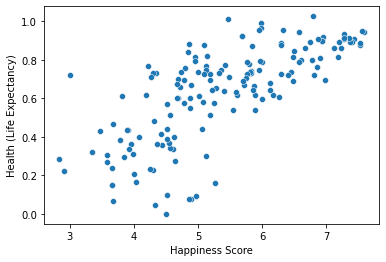

In [129]:
sns.scatterplot(x='Happiness Score',y='Health (Life Expectancy)',data=df)

<AxesSubplot:xlabel='Happiness Score', ylabel='Family'>

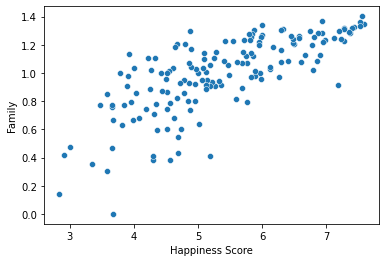

In [130]:
sns.scatterplot(x='Happiness Score',y='Family',data=df)

<AxesSubplot:xlabel='Happiness Score', ylabel='Trust (Government Corruption)'>

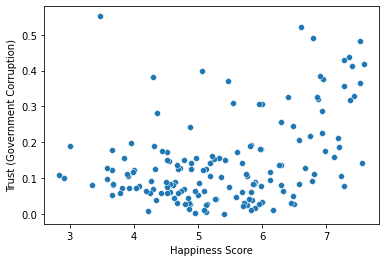

In [131]:
sns.scatterplot(x='Happiness Score',y='Trust (Government Corruption)',data=df)

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

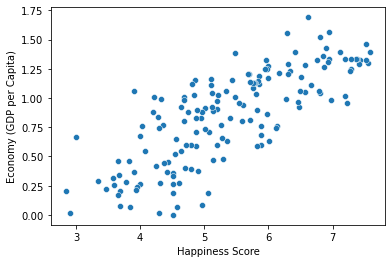

In [132]:
sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df)

<AxesSubplot:xlabel='Happiness Score', ylabel='Standard Error'>

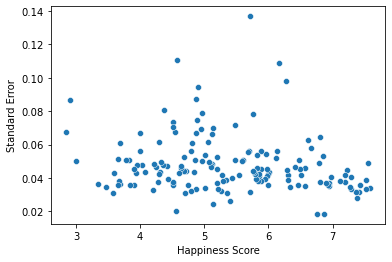

In [133]:
sns.scatterplot(x='Happiness Score',y='Standard Error',data=df)

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

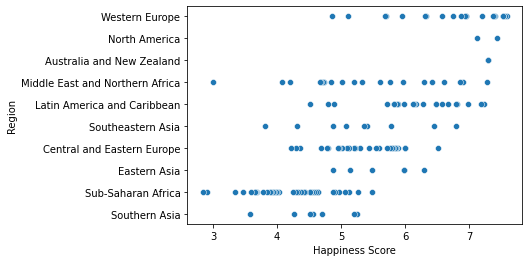

In [134]:
sns.scatterplot(x='Happiness Score',y='Region',data=df)

# Corelation

In [135]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [136]:
df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

<AxesSubplot:>

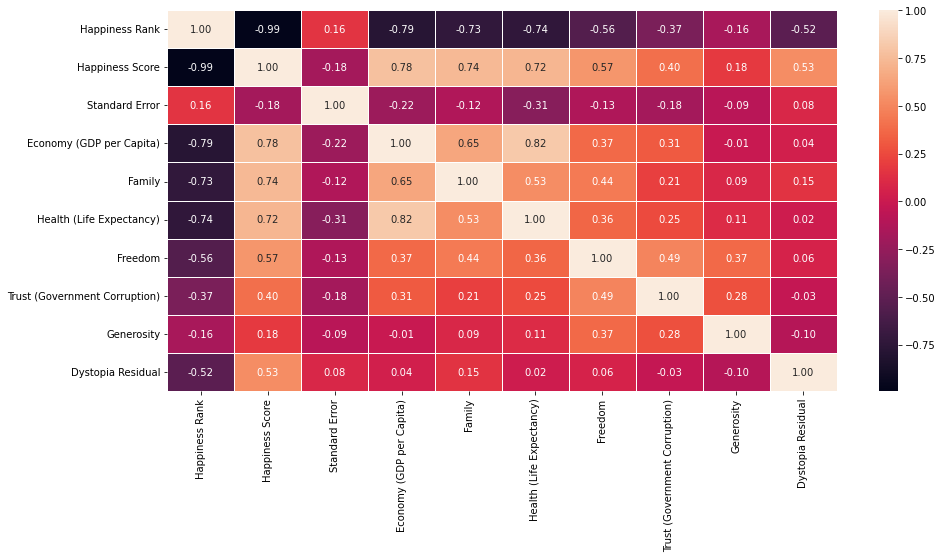

In [137]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='white',fmt='.2f')

describeing Dataset

In [138]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


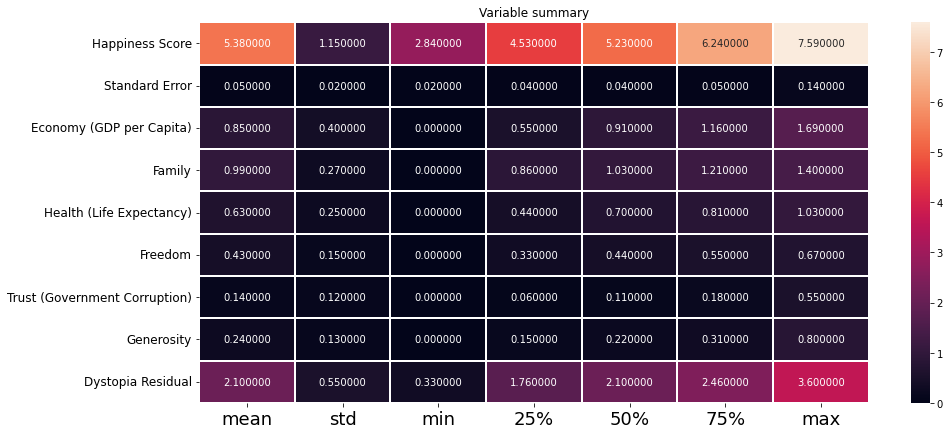

In [87]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('Variable summary')
plt.show()

In [88]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Normal Distribution curve

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

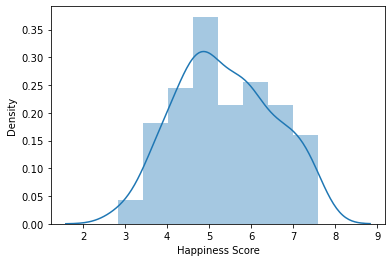

In [89]:
sns.distplot(df['Happiness Score'])

checking for outliers

<AxesSubplot:>

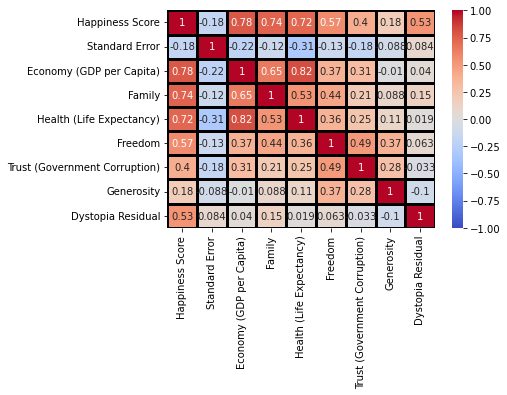

In [94]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [139]:
df=df.drop(['Country', 'Region'],axis=1)
df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [140]:
x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

In [141]:
x.shape,y.shape

((158, 9), (158,))

# split data

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((126, 9), (32, 9), (126,), (32,))

In [143]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# Test

In [144]:
pred=lr.predict(x_test)
pred

array([5.98703167, 7.22560655, 4.41925166, 6.9825309 , 7.36356468,
       4.63346011, 5.00700172, 7.56073816, 4.83919722, 5.88901286,
       6.48506739, 5.39870399, 6.66961808, 6.57399531, 4.88441557,
       5.09754119, 6.13014739, 6.16757795, 5.79052741, 3.34011415,
       5.84758418, 6.47670844, 5.12413456, 3.67789002, 5.98374254,
       2.83908725, 4.51229769, 6.8671718 , 6.5749956 , 5.26801617,
       4.36914457, 3.95567235])

In [145]:
y_test

45     5.987
11     7.226
124    4.419
15     6.983
7      7.364
113    4.633
92     5.007
1      7.561
102    4.839
51     5.889
31     6.485
73     5.399
26     6.670
29     6.574
97     4.885
88     5.098
41     6.130
40     6.168
59     5.791
154    3.340
54     5.848
32     6.477
85     5.124
147    3.678
46     5.984
157    2.839
121    4.512
20     6.867
28     6.575
77     5.268
125    4.369
139    3.956
Name: Happiness Score, dtype: float64

In [147]:
diff=y_test-pred
diff

45    -0.000032
11     0.000393
124   -0.000252
15     0.000469
7      0.000435
113   -0.000460
92    -0.000002
1      0.000262
102   -0.000197
51    -0.000013
31    -0.000067
73     0.000296
26     0.000382
29     0.000005
97     0.000584
88     0.000459
41    -0.000147
40     0.000422
59     0.000473
154   -0.000114
54     0.000416
32     0.000292
85    -0.000135
147    0.000110
46     0.000257
157   -0.000087
121   -0.000298
20    -0.000172
28     0.000004
77    -0.000016
125   -0.000145
139    0.000328
Name: Happiness Score, dtype: float64

In [148]:
pd.DataFrame(np.c_[y_test,pred,diff],columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,5.987,5.987032,-0.000032
1,7.226,7.225607,0.000393
2,4.419,4.419252,-0.000252
3,6.983,6.982531,0.000469
4,7.364,7.363565,0.000435
5,4.633,4.633460,-0.000460
6,5.007,5.007002,-0.000002
7,7.561,7.560738,0.000262
8,4.839,4.839197,-0.000197
9,5.889,5.889013,-0.000013
